# LSTM Time Series Forecasting Tutorial in Python, Tensorflow and Keras

https://www.youtube.com/watch?v=c0k-YLQGKjY

In [ ]:
!pip install tensorflow pandas numpy matplotlib

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from pathlib import Path

2022-02-19 13:16:57.330515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-19 13:16:57.330545: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.shape

(420551, 15)

In [5]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [6]:
# only use a portion of the data
# take every hour
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [7]:
df.shape

(70091, 15)

In [8]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [9]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [11]:
# for this example only use a single column

<AxesSubplot:xlabel='Date Time'>

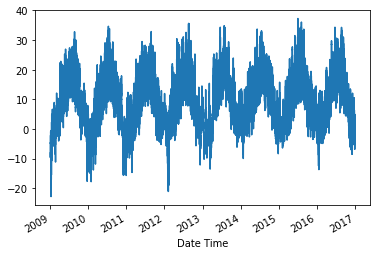

In [14]:
temp = df['T (degC)']
temp.plot()

In [15]:
def df_to_X_y(df, window_size=5):
    # window_size is the number of samples to take
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [16]:
WINDOW_SIZE=5
X,y = df_to_X_y(temp, WINDOW_SIZE)

In [17]:
X.shape

(70086, 5, 1)

In [18]:
y.shape

(70086,)

In [19]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]



In [20]:
X_train.shape, X_val.shape, X_test.shape

((60000, 5, 1), (5000, 5, 1), (5086, 5, 1))

In [21]:
y_train.shape, y_val.shape, y_test.shape

((60000,), (5000,), (5086,))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [24]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))


2022-02-19 13:54:17.954028: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-19 13:54:17.954061: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-19 13:54:17.954085: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-02-19 13:54:17.954340: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [26]:
cp = ModelCheckpoint('model1/', save_best_only=True)


In [27]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1861/1875 [============================>.] - ETA: 0s - loss: 35.8288 - root_mean_squared_error: 5.9857

2022-02-19 13:58:11.572428: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 35.5874 - root_mean_squared_error: 5.9655 - val_loss: 1.2233 - val_root_mean_squared_error: 1.1060
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 1.8887 - root_mean_squared_error: 1.3743

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 1.8881 - root_mean_squared_error: 1.3741 - val_loss: 0.6302 - val_root_mean_squared_error: 0.7939
Epoch 3/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.9107 - root_mean_squared_error: 0.9543

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.9111 - root_mean_squared_error: 0.9545 - val_loss: 0.5524 - val_root_mean_squared_error: 0.7432
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.7380 - root_mean_squared_error: 0.8591

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.7381 - root_mean_squared_error: 0.8591 - val_loss: 0.5234 - val_root_mean_squared_error: 0.7234
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6834 - root_mean_squared_error: 0.8267

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6828 - root_mean_squared_error: 0.8263 - val_loss: 0.5159 - val_root_mean_squared_error: 0.7183
Epoch 6/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6639 - root_mean_squared_error: 0.8148

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6639 - root_mean_squared_error: 0.8148 - val_loss: 0.5013 - val_root_mean_squared_error: 0.7081
Epoch 7/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6556 - root_mean_squared_error: 0.8097

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6564 - root_mean_squared_error: 0.8102 - val_loss: 0.4981 - val_root_mean_squared_error: 0.7058
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6506 - root_mean_squared_error: 0.8066 - val_loss: 0.4996 - val_root_mean_squared_error: 0.7068
Epoch 9/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.6477 - root_mean_squared_error: 0.8048

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6477 - root_mean_squared_error: 0.8048 - val_loss: 0.4908 - val_root_mean_squared_error: 0.7005
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6461 - root_mean_squared_error: 0.8038 - val_loss: 0.5137 - val_root_mean_squared_error: 0.7167


In [30]:
model1.history

In [34]:
losses = pd.DataFrame(model1.history.history)
losses.head()


,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,35.587391,5.965517,1.223281,1.106020
1,1.888077,1.374073,0.630226,0.793868
2,0.911103,0.954517,0.552420,0.743249
3,0.738126,0.859143,0.523367,0.723441
4,0.682813,0.826325,0.515908,0.718267


<AxesSubplot:>

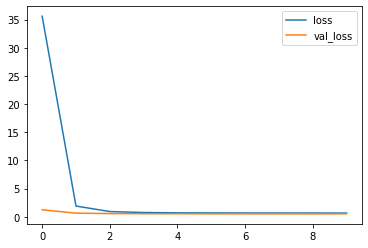

In [35]:
# losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [36]:
# load best model
from tensorflow.keras.models import load_model

In [37]:
model1 = load_model('model1/')

In [38]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train}) 

In [39]:
train_results

,Train Predictions,Actuals
0,-9.884558,-9.67
1,-9.720004,-9.17
2,-8.839842,-8.10
3,-7.411562,-7.66
4,-7.280581,-7.04
...,...,...
59995,6.059855,6.07
59996,7.156456,9.88
59997,12.114364,13.53
59998,16.049517,15.43


In [40]:
# plotting

In [41]:
import matplotlib.pyplot as plt

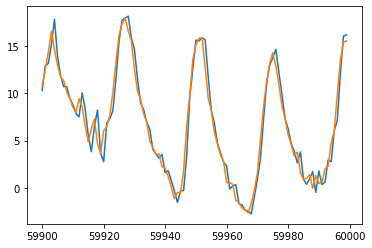

In [48]:
plt.plot(train_results['Train Predictions'][-100:])
plt.plot(train_results['Actuals'][-100:])

In [49]:
# Look at validation

In [50]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val}) 

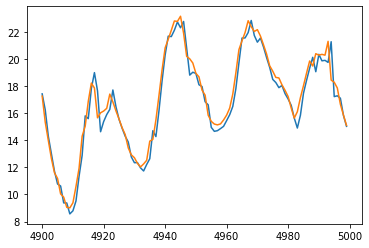

In [51]:
plt.plot(val_results['Val Predictions'][-100:])
plt.plot(val_results['Actuals'][-100:])

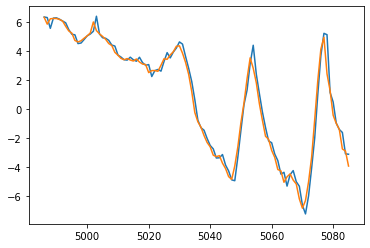

In [52]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test}) 
plt.plot(test_results['Test Predictions'][-100:])
plt.plot(test_results['Actuals'][-100:])